Instalar as bibliotecas GDAL e RASTERIO

In [ ]:
!pip install gdal
!pip install rasterio

In [ ]:
# IMPORTAR A BIBLIOTECA TIFFFILE
import tifffile as tif

In [ ]:
img = tif.imread('/content/drive/MyDrive/GEE/stacked_image_with_indices_2020.tif')

In [ ]:
!pip install imagecodecs

In [ ]:
img.shape

(6522, 3180, 6)

In [ ]:
# IMPORTAR A BIBLIOTECA MATPLOTLIB COM O METODO PYPLOT
import matplotlib.pyplot as plt

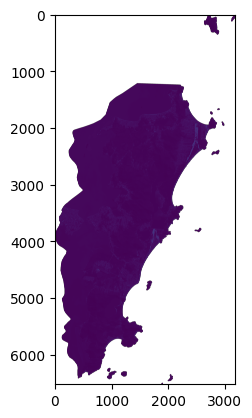

In [ ]:
plt.imshow(img[:,:,1])

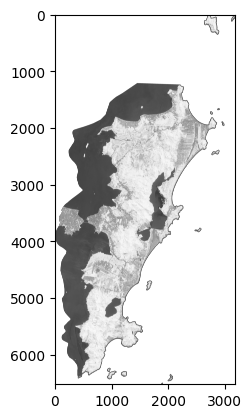

In [ ]:
# PLOTAR COM OUTRA ESCALA DE COR
plt.imshow(img[:,:,4], cmap='grey' )

In [ ]:
# INSTALAR A BIBLIOTECA SPECTRAL
!pip install spectral

In [ ]:
#IMPORTAR O MÉTODO IMSHOW DA BIBLIOTECA SPECTRAL
from spectral import imshow

ImageView object:
  Display bands       :  (4, 3, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.961313009262085), np.float64(nan)]
    G: [np.float64(0.0016499999910593033), np.float64(nan)]
    B: [np.float64(0.021700000390410423), np.float64(nan)]

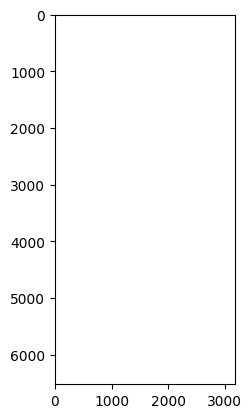

In [ ]:
imshow(img, bands=(4,3,2))

GDAL

In [ ]:
from osgeo import gdal

In [ ]:
img2 = gdal.Open('/content/drive/MyDrive/GEE/stacked_image_with_indices_2020.tif')

/usr/local/lib/python3.12/dist-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [ ]:
print(img2)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x786bfc43eeb0> >


In [ ]:
img3 = img2.ReadAsArray()

In [ ]:
img3.shape

(6, 6522, 3180)

ImageView object:
  Display bands       :  (4, 3, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.7819905281066895), np.float64(nan)]
    G: [np.float64(-0.7695852518081665), np.float64(nan)]
    B: [np.float64(-0.7934272289276123), np.float64(nan)]

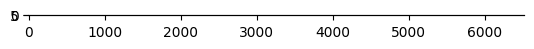

In [ ]:
imshow(img3, bands=(4,3,2))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(0.0016499999910593033), np.float64(nan)]
    G: [np.float64(0.0016499999910593033), np.float64(nan)]
    B: [np.float64(0.0016499999910593033), np.float64(nan)]

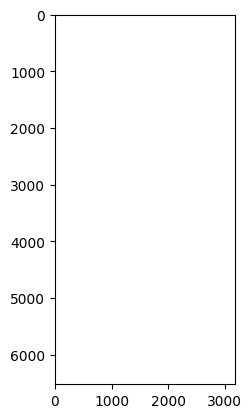

In [ ]:
imshow(img3[3,:,:])

In [ ]:
img3 = img3.swapaxes(0,2)

In [ ]:
img3.shape

(3180, 6522, 6)

In [ ]:
img3 = img3.swapaxes(0,1)

In [ ]:
img3.shape

(6522, 3180, 6)

ImageView object:
  Display bands       :  (4, 3, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.961313009262085), np.float64(nan)]
    G: [np.float64(0.0016499999910593033), np.float64(nan)]
    B: [np.float64(0.021700000390410423), np.float64(nan)]

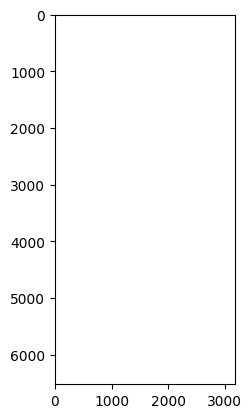

In [ ]:
imshow(img3, bands=(4,3,2))

In [ ]:
b2 = img2.GetRasterBand(2).ReadAsArray()

RASTERIO

In [ ]:
import rasterio
from rasterio.plot import show

In [ ]:
rst = rasterio.open('/content/drive/MyDrive/GEE/stacked_image_with_indices_2020.tif')

In [ ]:
print(rst)

<open DatasetReader name='/content/drive/MyDrive/GEE/stacked_image_with_indices_2020.tif' mode='r'>


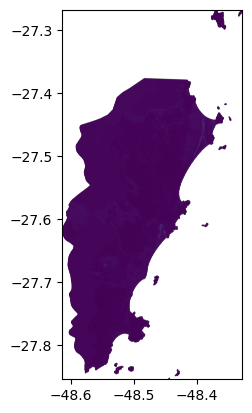

<Axes: >

In [ ]:
show(rst)

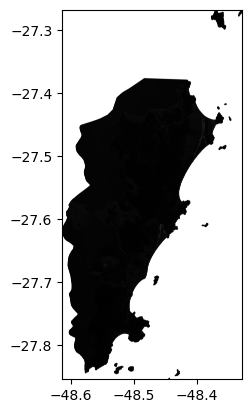

<Axes: >

In [ ]:
show(rst, cmap='Greys_r')

In [ ]:
b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)

In [ ]:
print("Shape of b1:", b1.shape)
print("Shape of b2:", b2.shape)
print("Shape of b4:", b4.shape)
stack = np.dstack([b2,b1,b4])

Shape of b1: (6522, 3180)
Shape of b2: (6522, 3180)
Shape of b4: (6522, 3180)


In [ ]:
import numpy as np

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(0.04800000041723251), np.float64(nan)]
    G: [np.float64(0.07464999705553055), np.float64(nan)]
    B: [np.float64(0.0016499999910593033), np.float64(nan)]

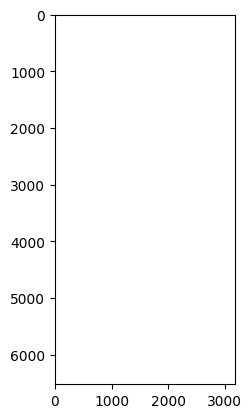

In [ ]:
imshow(stack)

In [ ]:
# Substituir valores NaN por zero
stack_filled = np.nan_to_num(stack, nan=0)

# Verificar se ainda existem NaNs (deve retornar False)
print("Existem NaNs após preencher?", np.isnan(stack_filled).any())

Existem NaNs após preencher? False


In [ ]:
imshow(stack_filled)